In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\ASUS\anaconda3\envs\python_primary\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


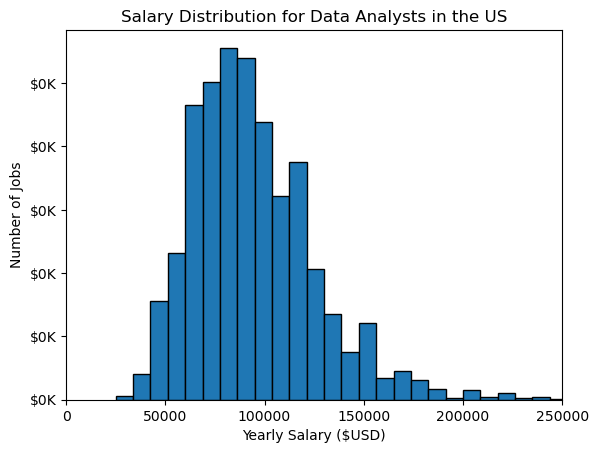

In [12]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_DA_US['salary_year_avg'].plot(kind = 'hist', bins=40, edgecolor='black')

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))

plt.xlim(0, 250000)
plt.title('Salary Distribution for Data Analysts in the US')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary ($USD)')
plt.show()